# Multilinear Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import pandas as pd

## Read clean dataset

In [59]:
df = pd.read_csv('clean.csv')
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,dia,mes
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,2.000000,0,25612,1146.935458,11,2
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,2.250000,0,25612,1146.935458,11,2
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,24.750000,1,42220,1146.935458,11,2
3,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,26.500000,1,44450,1146.935458,11,2
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,6.666667,1,46690,1146.935458,11,2


## Normalize data

In [60]:
target_scaler = preprocessing.MinMaxScaler()
target_scaler.fit_transform(df['price'].values.reshape(-1, 1))

array([[0.05160057],
       [0.05160057],
       [0.325222  ],
       ...,
       [0.93281381],
       [0.97377136],
       [0.97377136]])

In [61]:
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,dia,mes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.012590,0.0,0.051601,0.587407,0.333333,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.017986,0.0,0.051601,0.587407,0.333333,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.503597,0.5,0.325222,0.587407,0.333333,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.541367,0.5,0.361962,0.587407,0.333333,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.113309,0.5,0.398867,0.587407,0.333333,0.0


## Split dataset into training and testing subsets

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df['price'], test_size=0.3, random_state=0)

## Fit the LinearRegression model

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict using the trained model

In [64]:
y_pred = model.predict(X_test)
y_pred

array([0.56436157, 0.57946777, 0.52270508, ..., 0.55911255, 0.50500488,
       0.54544067])


## Scale back the data

In [75]:
scaled_back_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
scaled_back_test = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

array([[56735.05435181],
       [57651.95544434],
       [54206.63012695],
       ...,
       [56416.45437622],
       [53132.28137207],
       [55586.61257935]])

## Assess the performance of the model

In [71]:

print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.018409441486903384
mean_absolute_error :  0.10624428998624136


In [72]:
# compare test and prediction (normalized data)
for test, pred in zip(y_test, y_pred):
    print(f"Predicted: {pred} \t Original: {test}\n")

Predicted: 0.564361572265625 	 Original: 0.6291414732194343

Predicted: 0.5794677734375 	 Original: 0.4180766759477404

Predicted: 0.522705078125 	 Original: 0.33018106331449654

Predicted: 0.572235107421875 	 Original: 0.6169827174324924

Predicted: 0.60443115234375 	 Original: 0.7704499398652322

Predicted: 0.236297607421875 	 Original: 0.1182266009852217

Predicted: 0.601226806640625 	 Original: 0.6246766726526847

Predicted: 0.675140380859375 	 Original: 0.660839909715472

Predicted: 0.544677734375 	 Original: 0.35916107880125875

Predicted: 0.4647216796875 	 Original: 0.36354350297378785

Predicted: 0.6572265625 	 Original: 0.4910786365059228

Predicted: 0.48345947265625 	 Original: 0.561938810814373

Predicted: 0.646240234375 	 Original: 0.9014613572334711

Predicted: 0.246795654296875 	 Original: 0.23447616850915204

Predicted: 0.18475341796875 	 Original: 0.23447616850915204

Predicted: 0.5042724609375 	 Original: 0.561938810814373

Predicted: 0.429718017578125 	 Original: 0.61

In [81]:
print(y_pred-y_test)

68038   -0.064780
2950     0.161391
38776    0.192524
10354   -0.044748
42089   -0.166019
           ...   
40524   -0.261416
78390    0.017220
5143     0.027010
48585    0.249556
70623   -0.018376
Name: price, Length: 26952, dtype: float64


In [79]:
print( 
  'mean_squared_error : ', mean_squared_error(scaled_back_test.flatten(), scaled_back_pred.flatten())) 
print( 
  'mean_absolute_error : ', mean_absolute_error(scaled_back_test.flatten(), scaled_back_pred.flatten())) 

mean_squared_error :  67822698.51117608
mean_absolute_error :  6448.709669294893


In [80]:
for test, pred in zip(scaled_back_test.flatten(), scaled_back_pred.flatten()):
    print(f"Predicted: {pred:.2f} \t Original: {test:.2f}")

Predicted: 56735.05 	 Original: 60667.00
Predicted: 57651.96 	 Original: 47856.00
Predicted: 54206.63 	 Original: 42521.00
Predicted: 57212.95 	 Original: 59929.00
Predicted: 59167.16 	 Original: 69244.00
Predicted: 36822.56 	 Original: 29656.00
Predicted: 58972.66 	 Original: 60396.00
Predicted: 63459.00 	 Original: 62591.00
Predicted: 55540.30 	 Original: 44280.00
Predicted: 50687.21 	 Original: 44546.00
Predicted: 62371.68 	 Original: 52287.00
Predicted: 51824.54 	 Original: 56588.00
Predicted: 61704.84 	 Original: 77196.00
Predicted: 37459.76 	 Original: 36712.00
Predicted: 33693.98 	 Original: 36712.00
Predicted: 53087.83 	 Original: 56588.00
Predicted: 48562.59 	 Original: 59537.00
Predicted: 55188.36 	 Original: 41269.00
Predicted: 54375.19 	 Original: 60232.00
Predicted: 54034.36 	 Original: 36980.00
Predicted: 48253.26 	 Original: 45883.00
Predicted: 54882.73 	 Original: 57920.00
Predicted: 54779.00 	 Original: 83087.00
Predicted: 51357.75 	 Original: 54608.00
Predicted: 78507

In [82]:
print(scaled_back_pred.flatten() - scaled_back_test.flatten())

[-3931.94564819  9795.95544434 11685.63012695 ...  1639.45437622
 15147.28137207 -1115.38742065]


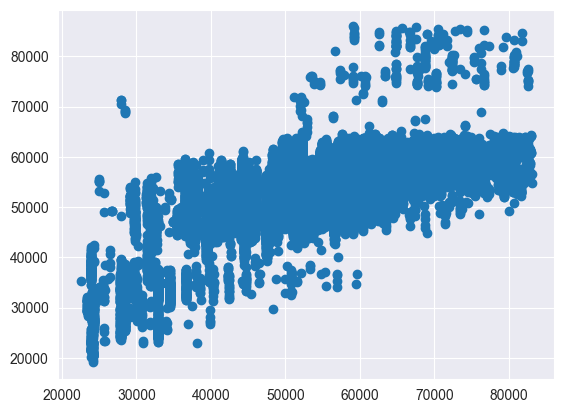

In [83]:
import matplotlib.pyplot as plt
plt.scatter(scaled_back_test.flatten(), scaled_back_pred.flatten())

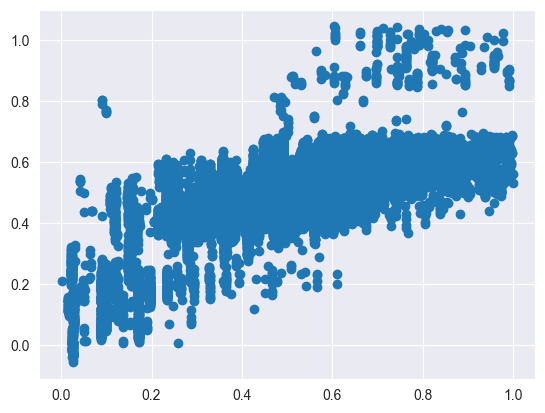

In [84]:
plt.scatter(y_test, y_pred)